In [1]:
import mipkit
from glob import glob
import os

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import gridspec

def read_image(file_path: str, image_size: tuple=None) -> np.ndarray:
    img_arr = cv2.imread(file_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    if image_size:
        img_arr = cv2.resize(img_arr, image_size)
    return img_arr

def show_multi_images(list_img_arr,  
                      ratio_size=1,
                      rows=1, 
                      plt_show=True, 
                      title=None, 
                      wspace=0, 
                      hspace=0, *args, **kwargs):
    """Show multiple images in a plot.

    Parameters
    ----------
    list_img_arr : list
        a list of numpy arrays
    subplot_size: int
        subplot image size to show
    rows: int
        A number of rows to show images
    plt_show: bool
        Finalize preparing plot and display
    title: str
        A title of the figure
    """
    columns = len(list_img_arr)//rows
    fig = plt.figure(figsize=(int(ratio_size*columns), int((ratio_size/2)*rows)))
    gs = gridspec.GridSpec(rows, columns, 
                           wspace=wspace, 
                           hspace=wspace)
    
    for i in range(1, columns*rows + 1):
        a = fig.add_subplot(rows, columns, i)
        plt.imshow(list_img_arr[i - 1])
        a.set_aspect('equal')
        a.set_xticklabels([])
        a.set_yticklabels([])
        
    if title:
        plt.title(title)
        
    if plt_show:
        plt.show()
        

def show_image_with_paths(list_paths, 
                          subplot_size=10, 
                          rows=1,  
                          img_dir=None, **kwargs):
    list_img_arr = []
    for path in list_paths:
        if img_dir:
            path = os.path.join(img_dir, path)
        img_arr = read_image(path)
        list_img_arr.append(img_arr)
    show_multi_images(list_img_arr=list_img_arr, rows=rows, **kwargs)

In [3]:
paths = glob('/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/*/*.*')

In [109]:
len(paths)

19

In [110]:
paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [111]:
paths[:10]

['/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_0.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_15.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_30.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_45.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_60.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_75.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_90.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_105.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/00000-3-000-m-28-001-hap-hap-hap_120.jpg',
 '/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train_1/00000/0

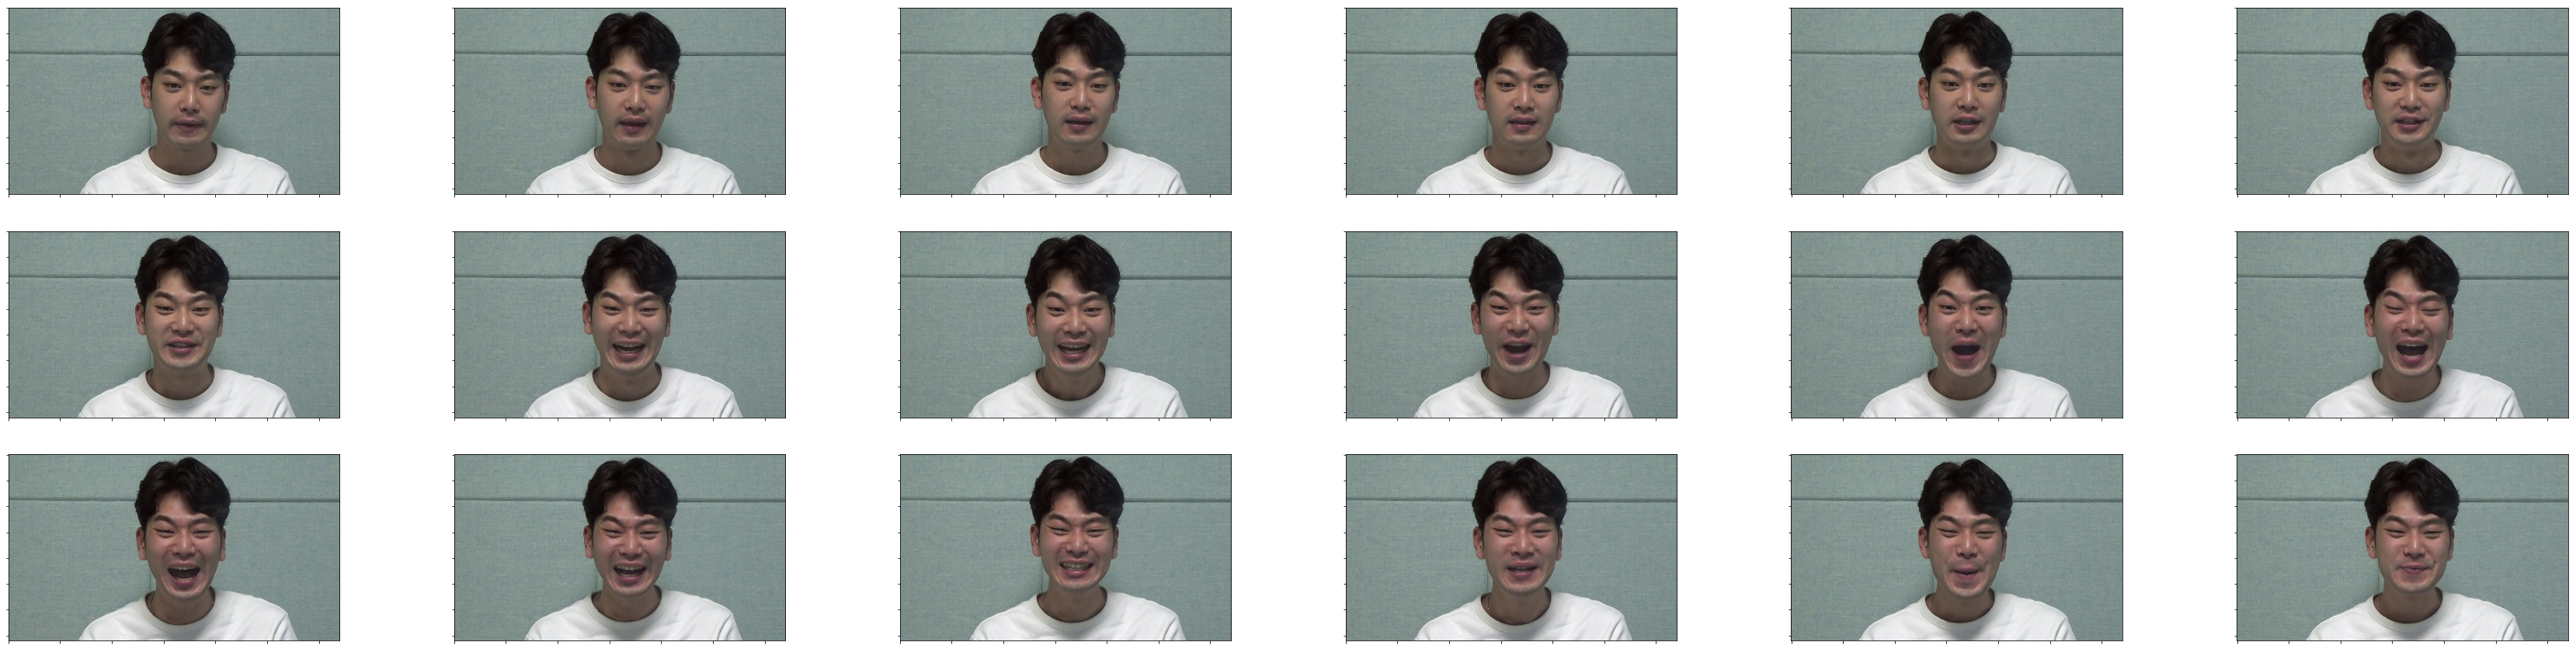

In [112]:
show_image_with_paths(paths, rows=3, ratio_size=10)

In [5]:
os.path.dirname(paths[0])

'/mnt/DATA2/congvm/MERC2020/2020-1/image_frame_train/34953'

In [7]:
folders = set([os.path.dirname(path) for path in paths])

In [11]:
len(paths)/len(folders)

6.062902862294343